#Inicio

Começaremos instalando e importando as bibliotecas necessárias para o uso.

In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet
from sklearn import metrics
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
import numpy as np

# Tratamento de dados
Faz o tratamento e a exibição de dados

Dataframe do csv. Enviar o csv para a área de arquivos sempre que abrir o notebook.

In [ ]:
df = pd.read_csv('DadosDefinitivos_filtrados.csv')
df.head()

,Unnamed: 0,TIME_STAMP,RAD_GLO,TEM_INS,UMD_INS
0,0,2021-06-09 00:00:00,-0.1,24.8,99.0
1,1,2021-06-09 01:00:00,-1.1,24.6,100.0
2,2,2021-06-09 02:00:00,-2.0,24.4,89.0
3,3,2021-06-09 03:00:00,-1.7,24.4,89.0
4,4,2021-06-09 04:00:00,-1.9,24.3,89.0


Seleção das futuras colunas de data a serem nomeadas (ds) e (y)

In [ ]:
df=df[["TIME_STAMP","TEM_INS"]]
df.head()

,TIME_STAMP,TEM_INS
0,2021-06-09 00:00:00,24.8
1,2021-06-09 01:00:00,24.6
2,2021-06-09 02:00:00,24.4
3,2021-06-09 03:00:00,24.4
4,2021-06-09 04:00:00,24.3


Atribuição das variáveis às colunas que são exigidas pelo Prophet

In [ ]:
df.columns = ['ds','y']

Geração de um período para teste e para treino

In [ ]:
treino=df.iloc[7992:]
test=df.iloc[7992:]

#treino=df.iloc[0:47]
#test=df.iloc[48:95]

Verificação (via Iloc) para a data correta.

In [ ]:
df.iloc[7992:]

,ds,y
7992,2022-05-08 00:00:00,24.4
7993,2022-05-08 01:00:00,24.3
7994,2022-05-08 02:00:00,24.2
7995,2022-05-08 03:00:00,24.1
7996,2022-05-08 04:00:00,23.9
...,...,...
8779,2022-06-09 19:00:00,30.7
8780,2022-06-09 20:00:00,23.3
8781,2022-06-09 21:00:00,23.4
8782,2022-06-09 22:00:00,23.4


Verificação se o período de teste está iniciando correntamente

In [ ]:
test.head(25)

,ds,y
7992,2022-05-08 00:00:00,24.4
7993,2022-05-08 01:00:00,24.3
7994,2022-05-08 02:00:00,24.2
7995,2022-05-08 03:00:00,24.1
7996,2022-05-08 04:00:00,23.9
7997,2022-05-08 05:00:00,23.9
7998,2022-05-08 06:00:00,23.9
7999,2022-05-08 07:00:00,23.9
8000,2022-05-08 08:00:00,23.6
8001,2022-05-08 09:00:00,23.5


Segunda verificação

In [ ]:
test


,ds,y
7992,2022-05-08 00:00:00,24.4
7993,2022-05-08 01:00:00,24.3
7994,2022-05-08 02:00:00,24.2
7995,2022-05-08 03:00:00,24.1
7996,2022-05-08 04:00:00,23.9
...,...,...
8779,2022-06-09 19:00:00,30.7
8780,2022-06-09 20:00:00,23.3
8781,2022-06-09 21:00:00,23.4
8782,2022-06-09 22:00:00,23.4


# Previsão de dados

Comandos para a previsão de dados

Incialmente vamos dividir esses dados em um período de treino e o período de teste, para então fazer a execução dos comandos. Os dados são coletados diariamente e a cada hora no período de um ano entre 03/2021 e 03/2022



Instanciando o o prophet e fazendo o treino

In [ ]:
m = Prophet()
m.fit(treino)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
m.make_future_dataframe

<bound method Prophet.make_future_dataframe of <fbprophet.forecaster.Prophet object at 0x7f76ab32afd0>>

In [ ]:
future = m.make_future_dataframe(720, include_history=False,freq='H')
future.tail(24)

,ds
696,2022-07-09 00:00:00
697,2022-07-09 01:00:00
698,2022-07-09 02:00:00
699,2022-07-09 03:00:00
700,2022-07-09 04:00:00
701,2022-07-09 05:00:00
702,2022-07-09 06:00:00
703,2022-07-09 07:00:00
704,2022-07-09 08:00:00
705,2022-07-09 09:00:00


In [ ]:
f=m.predict(future)

In [ ]:
f[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
696,2022-07-09 00:00:00,24.570085,17.730122,32.535440
697,2022-07-09 01:00:00,24.487855,17.502279,32.591179
698,2022-07-09 02:00:00,24.285030,17.702697,32.135625
699,2022-07-09 03:00:00,24.068030,17.348995,32.187148
700,2022-07-09 04:00:00,23.976880,17.314439,32.062946
701,2022-07-09 05:00:00,23.994502,16.809841,32.165502
702,2022-07-09 06:00:00,23.946469,17.303976,32.225828
703,2022-07-09 07:00:00,23.705111,16.734369,31.852537
704,2022-07-09 08:00:00,23.396107,16.574000,31.447813
705,2022-07-09 09:00:00,23.385027,16.368651,31.518320


In [ ]:
ypred = m.predict(test)

#Validação de dados

Validação cruzada

In [ ]:
print('MAE: {}'.format(metrics.mean_absolute_error(test['y'].values, ypred['yhat'].values)))

MAE: 0.816621040402112


In [ ]:
print('MASE: {}'.format(metrics.mean_absolute_percentage_error(test['y'].values, ypred['yhat'].values)))

MASE: 0.03044211691834199


In [ ]:

f = f.rename(columns={'yhat': 'TEMP_INS'})

In [ ]:
d=f['TEMP_INS'].iloc[696:]
#d
d.to_csv('temperatura001')
#c=pd.read_csv('temperatura01')
d.head(30)

696    24.570085
697    24.487855
698    24.285030
699    24.068030
700    23.976880
701    23.994502
702    23.946469
703    23.705111
704    23.396107
705    23.385027
706    24.022759
707    25.360155
708    27.079581
709    28.697641
710    29.855091
711    30.452180
712    30.555536
713    30.222463
714    29.443871
715    28.253884
716    26.859487
717    25.611524
718    24.802900
719    24.470412
Name: TEMP_INS, dtype: float64

In [ ]:
ypred['yhat'].describe

<bound method NDFrame.describe of 0      24.757072
1      24.595444
2      24.387693
3      24.196667
4      24.086935
         ...    
787    27.720912
788    26.871264
789    26.083924
790    25.520407
791    25.211459
Name: yhat, Length: 792, dtype: float64>

In [ ]:
test['y'].describe

<bound method NDFrame.describe of 7992    24.4
7993    24.3
7994    24.2
7995    24.1
7996    23.9
        ... 
8779    30.7
8780    23.3
8781    23.4
8782    23.4
8783    23.3
Name: y, Length: 792, dtype: float64>

In [ ]:
test.shape, treino.shape

((792, 2), (7991, 2))

Gráficos comparando y e yhat

Outros modelos de gráficos

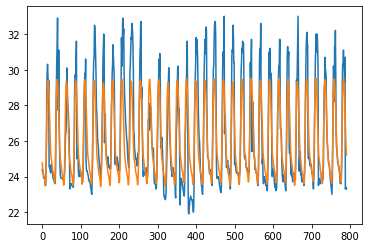

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(test.y)),test.y)
plt.plot(range(len(ypred.yhat)),ypred.yhat)
#na.fill

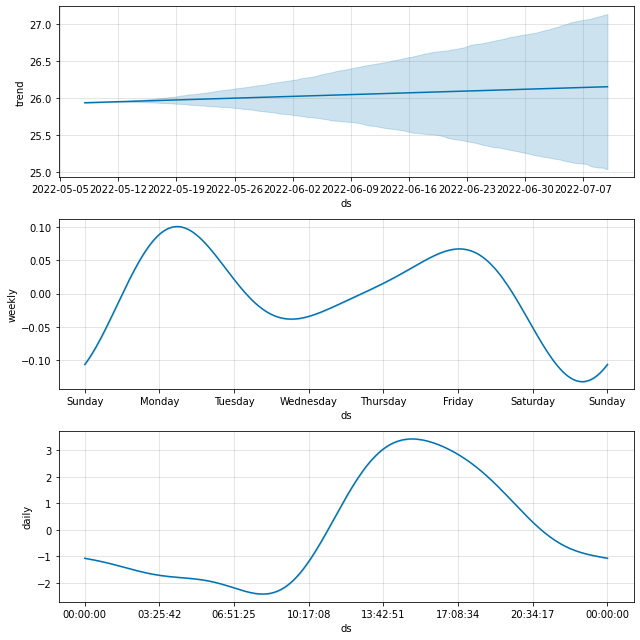

In [ ]:
cm=m.plot_components(f)

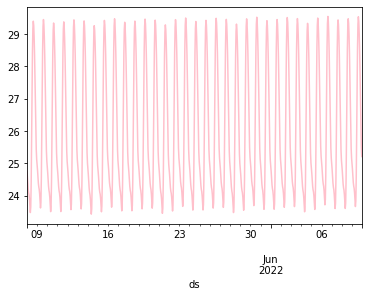

In [ ]:
ypred.set_index('ds')['yhat'].plot(color='pink')

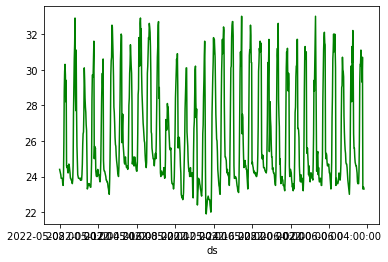

In [ ]:

test.set_index('ds')['y'].plot(color='green')